In [89]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
import matplotlib.pyplot as plt
import numpy as np

In [231]:
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [91]:
x_train.shape


(50000, 32, 32, 3)

In [92]:
y_train.shape

(50000, 1)

In [93]:
y_train_flatten = y_train.flatten()

In [94]:
img_type = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [95]:
def show_img(x,y,index):
    plt.figure(figsize=(3,3))
    plt.imshow(x_train[index])
    plt.xlabel(img_type[y[index]])

In [96]:
y_train_flatten[5]

1

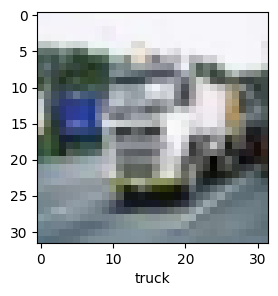

In [124]:
show_img(x_train,y_train_flatten,1000)

In [46]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [101]:
model = models.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),

])

In [102]:
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [232]:
x_train = x_train /255.0
x_test = x_test/255.0


In [103]:
model.fit(x_train,y_train, epochs = 2)

Epoch 1/2
1563/1563 [==============================] - 215s 134ms/step - loss: 1.8138 - accuracy: 0.3502
Epoch 2/2
1563/1563 [==============================] - 220s 141ms/step - loss: 1.6216 - accuracy: 0.4281


In [47]:
keras.models.Sequential??

Init signature: keras.models.Sequential(layers=None, name=None)
Source:        
@keras_export("keras.Sequential", "keras.models.Sequential")
class Sequential(functional.Functional):
    """`Sequential` groups a linear stack of layers into a `tf.keras.Model`.

    `Sequential` provides training and inference features on this model.

    Examples:

    ```python
    # Optionally, the first layer can receive an `input_shape` argument:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
    # Afterwards, we do automatic shape inference:
    model.add(tf.keras.layers.Dense(4))

    # This is identical to the following:
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(16,)))
    model.add(tf.keras.layers.Dense(8))

    # Note that you can also omit the `input_shape` argument.
    # In that case the model doesn't have any weights until the first call
    # to a training/evaluation method (since it isn't yet built):
    model = tf.k

In [266]:
from tensorflow.keras import regularizers 

cnn_ = models.Sequential([
    #cnn
    keras.layers.Conv2D(filters= 64,activation='relu',kernel_size = (3,3), input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),


    keras.layers.Conv2D(filters= 128,activation='relu',kernel_size = (3,3),),
    keras.layers.MaxPooling2D((2,2)),


    keras.layers.Conv2D(filters= 128,activation='relu',kernel_size = (3,3),),
    keras.layers.MaxPooling2D((2,2)),


    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)),
    keras.layers.Dropout(.3),
    keras.layers.Dense(10, activation = 'softmax', kernel_regularizer = regularizers.l2(0.01)),

])


In [267]:
cnn_.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)


In [240]:
y_train.flatten().shape

(50000,)

In [272]:
cnn_.fit(x_train,y_train,epochs = 30,callbacks=[early_stopping])

Epoch 1/30
1563/1563 [==============================] - 244s 156ms/step - loss: 0.6930 - accuracy: 0.7988
Epoch 2/30
1563/1563 [==============================] - 179s 114ms/step - loss: 0.6837 - accuracy: 0.8023
Epoch 3/30
1563/1563 [==============================] - 192s 123ms/step - loss: 0.6725 - accuracy: 0.8075
Epoch 4/30
1563/1563 [==============================] - 228s 146ms/step - loss: 0.6652 - accuracy: 0.8079
Epoch 5/30
1563/1563 [==============================] - 198s 126ms/step - loss: 0.6524 - accuracy: 0.8120
Epoch 6/30
1563/1563 [==============================] - 226s 144ms/step - loss: 0.6378 - accuracy: 0.8176
Epoch 7/30
1563/1563 [==============================] - 183s 117ms/step - loss: 0.6309 - accuracy: 0.8209
Epoch 8/30
1563/1563 [==============================] - 208s 133ms/step - loss: 0.6239 - accuracy: 0.8219
Epoch 9/30
1563/1563 [==============================] - 222s 142ms/step - loss: 0.6138 - accuracy: 0.8273
Epoch 10/30
1563/1563 [=======================

In [120]:
y_test_flatten = y_test.flatten()

In [273]:
cnn_.evaluate(x_test, y_test_flatten)

313/313 [==============================] - 11s 35ms/step - loss: 1.0293 - accuracy: 0.7388


[1.0293246507644653, 0.7387999892234802]

In [274]:
21.5*21.8

468.7

In [125]:
x_test.shape

(10000, 32, 32, 3)

In [265]:
cnn_.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 2, 2, 128)       

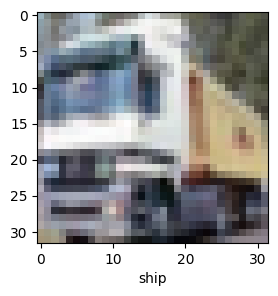

In [122]:
show_img(x_test,y_test_flatten,1)

In [255]:
pred = cnn_.predict(x_test)

313/313 [==============================] - 10s 30ms/step


In [256]:
y_pred_class= [np.argmax(element) for element in pred]

In [257]:
count = 0
for i in np.array(y_pred_class).reshape(-1) == y_test.reshape(-1):
    if i:
        count += 1

count/100

57.6

In [172]:
y_test[:100].reshape(-1)

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0,
       4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6,
       0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2,
       1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7,
       8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7], dtype=uint8)